In [1]:
with open('data.txt') as f:
    data = f.read().split('\n')

In [57]:
def parse_data(data):
    data = data.replace(">", "$").replace("<", "$")
    data = data.split('$')
    pos, vel = data[1], data[3]
    pos = [int(x.strip()) for x in pos.split(',')]
    vel = [int(x.strip()) for x in vel.split(',')]
    return {'x': pos[0], 'y': pos[1], 'vx': vel[0], 'vy': vel[1]}

In [109]:
parsed_data = [parse_data(d) for d in data]

In [39]:
def move_data(position, velocity):
    x = position[0] + velocity[0]
    y = position[1] + velocity[1]
    return [x, y], velocity

In [42]:
%matplotlib inline

In [43]:
import pandas as pd

In [146]:
def show_message(df):
    return df.plot(x='x', y='y', kind='scatter', figsize=(16, 9))

In [158]:
def move_stars(df):
    df['x'] = df['x'] + df['vx']
    df['y'] = df['y'] + df['vy']
    return df

In [159]:
df = pd.DataFrame(parsed_data)
xdist = df.x.max() - df.y.max()
ydist = df.y.max() - df.y.min()
attempts = pd.DataFrame({'attempt': [0], 'dist': [xdist + ydist]})

In [160]:
def update_attempts(attempt_number, df, attempts):
    move_stars(df)
    xdist = df.x.max() - df.y.max()
    ydist = df.y.max() - df.y.min()
    new_attempt = pd.DataFrame({'attempt': [attempt_number], 'dist': [xdist + ydist]})
    return new_attempt

In [161]:
for i in range(1, 20000):
    new_attempt = update_attempts(i, df, attempts)
    attempts = pd.concat([attempts, new_attempt])

In [162]:
best_attempt = attempts[attempts.dist == attempts.dist.min()].to_dict('records')

In [163]:
best_attempt

[{'attempt': 10009, 'dist': 52}]

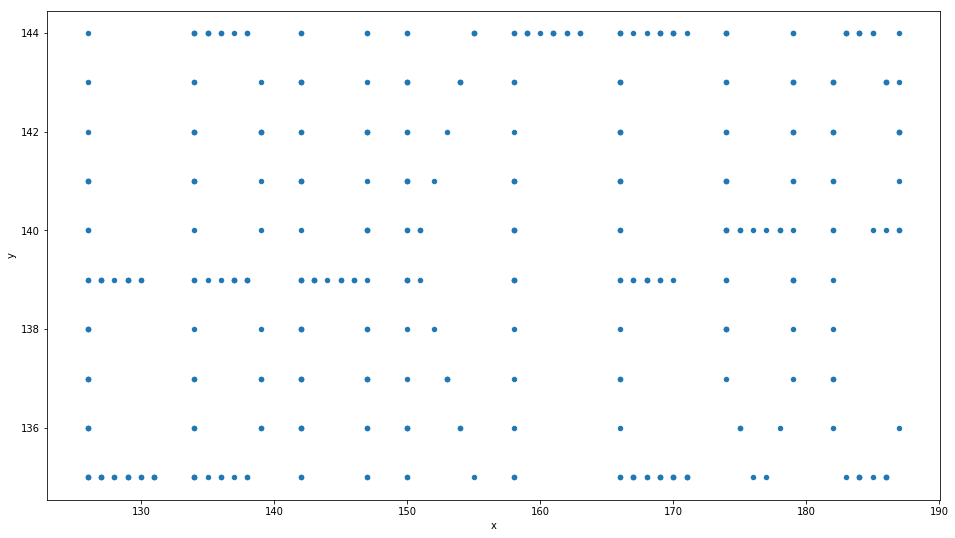

In [164]:
final = pd.DataFrame(parsed_data)
for i in range(best_attempt[0]['attempt']):
    move_stars(final)
show_message(final)

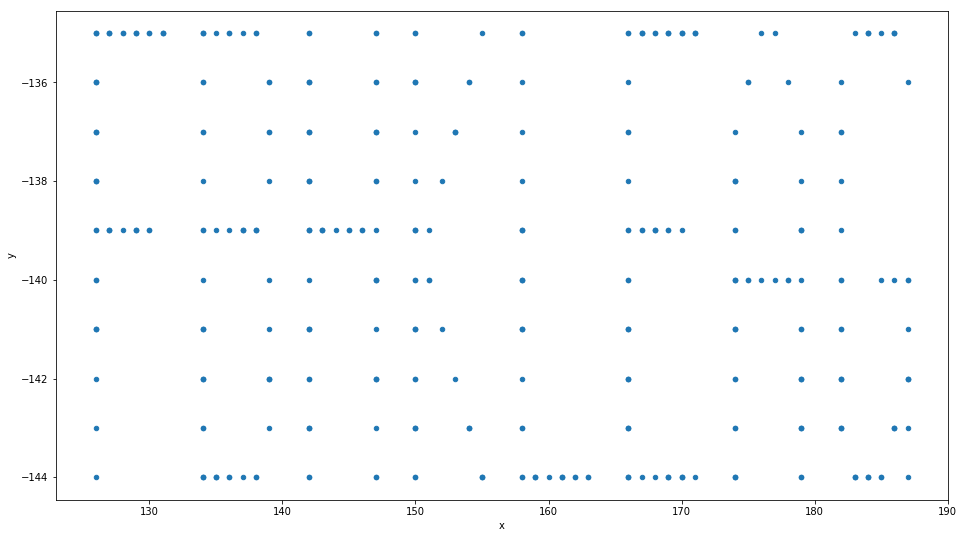

In [165]:
final['y'] = final['y'] * -1
show_message(final)